In [130]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
import numpy as np
from bandits import MultiArmedBandit

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

from multiprocessing import Pool

In [145]:
mpl.rcParams['font.size'] = 5
mpl.rcParams['figure.dpi'] = 300

In [150]:
time_horizon = 2000
number_of_experiments = 200

# N = 100
# strategy = 'epsilon_greedy'
# epsilon = 0.1
# T = 1000
initial_values_method = 'peek_once' 
# estimation_method = 'sample_average'
# stepsize = None
# c = 2
reward_expected_params = (0, 1) # drawn from normal distribution with [0] as mean, and [1] as std
reward_std_params = (2, 5) #drawn from uniform distrubution over given range

args = [
    ('UCB $(c=5)$', number_of_experiments, 'UCB', 0, time_horizon, initial_values_method, 'sample_average', None, 5, reward_expected_params, reward_std_params),
    ('UCB $(c=0.8)$', number_of_experiments, 'UCB', 0, time_horizon, initial_values_method, 'sample_average', None, 0.8, reward_expected_params, reward_std_params),
    ('UCB $(c=3)$', number_of_experiments, 'UCB', 0, time_horizon, initial_values_method, 'sample_average', None, 3, reward_expected_params, reward_std_params),
    ('UCB $(c=2)$', number_of_experiments, 'UCB', 0, time_horizon, initial_values_method, 'sample_average', None, 2, reward_expected_params, reward_std_params),
    ('UCB $(c=1)$', number_of_experiments, 'UCB', 0, time_horizon, initial_values_method, 'sample_average', None, 1, reward_expected_params, reward_std_params),
    ('Greedy', number_of_experiments, 'epsilon_greedy', 0, time_horizon, initial_values_method, 'sample_average', None, 2, reward_expected_params, reward_std_params),
    ('$\epsilon=0.01$', number_of_experiments, 'epsilon_greedy', 0.01, time_horizon, initial_values_method, 'sample_average', None, 2, reward_expected_params, reward_std_params),
    ('$\epsilon=0.1$', number_of_experiments, 'epsilon_greedy', 0.1, time_horizon, initial_values_method, 'sample_average', None, 2, reward_expected_params, reward_std_params),
       ]

In [151]:
with Pool(8) as pool:
    results = pool.starmap(MultiArmedBandit(15).average_behavior, args)

In [103]:
cache = results.copy()
cache = []

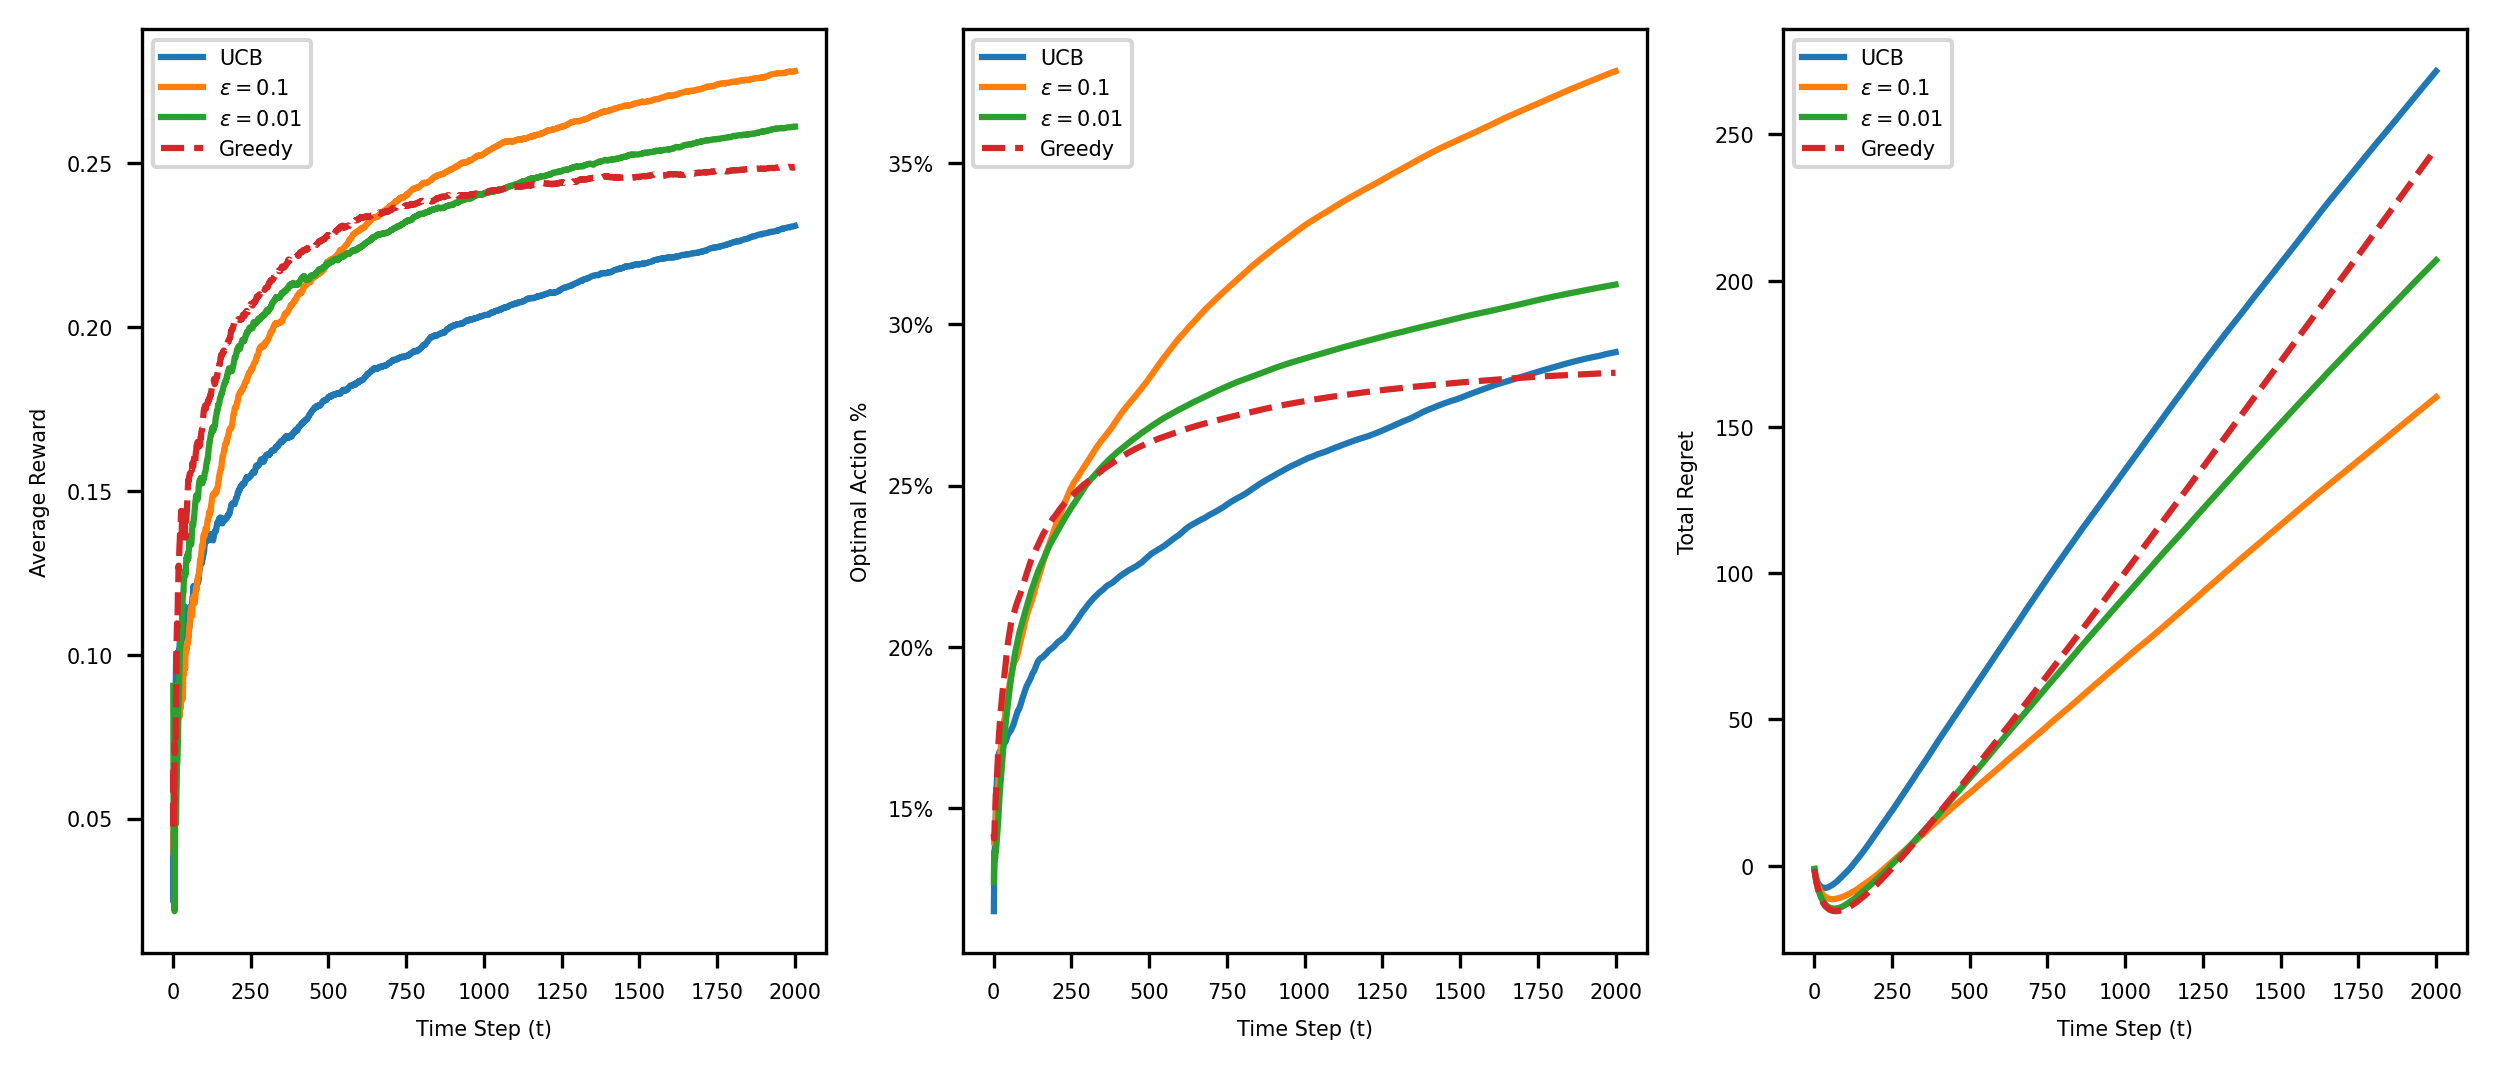

In [64]:
# ubc = results[0]
# greedy = results[1]
# epsilon_point_1 = results[2]
# epsilon1_point_zero_1 = results[3]

# fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(10,4))

# ax1.plot(range(1,time_horizon+1), ubc['average_reward'], label='UCB')
# ax1.plot(range(1,time_horizon+1), epsilon1_point_zero_1['average_reward'], label='$\epsilon=0.1$')
# ax1.plot(range(1,time_horizon+1), epsilon_point_1['average_reward'], label='$\epsilon=0.01$')
# ax1.plot(range(1,time_horizon+1), greedy['average_reward'], linestyle = '--', label='Greedy')
# ax1.set_ylabel('Average Reward')
# ax1.set_xlabel('Time Step (t)')

# ax2.plot(range(1,time_horizon+1), ubc['optimal_action'], label='UCB')
# ax2.plot(range(1,time_horizon+1), epsilon1_point_zero_1['optimal_action'], label='$\epsilon=0.1$')
# ax2.plot(range(1,time_horizon+1), epsilon_point_1['optimal_action'], label='$\epsilon=0.01$')
# ax2.plot(range(1,time_horizon+1), greedy['optimal_action'], linestyle = '--', label='Greedy')
# ax2.set_ylabel('Optimal Action %')
# ax2.set_xlabel('Time Step (t)')
# ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

# ax3.plot(range(1,time_horizon+1), ubc['total_regret'], label='UCB')
# ax3.plot(range(1,time_horizon+1), epsilon1_point_zero_1['total_regret'], label='$\epsilon=0.1$')
# ax3.plot(range(1,time_horizon+1), epsilon_point_1['total_regret'], label='$\epsilon=0.01$')
# ax3.plot(range(1,time_horizon+1), greedy['total_regret'], linestyle = '--', label='Greedy')
# ax3.set_ylabel('Total Regret')
# ax3.set_xlabel('Time Step (t)')

# ax1.legend()
# ax2.legend()
# ax3.legend()
# plt.show()

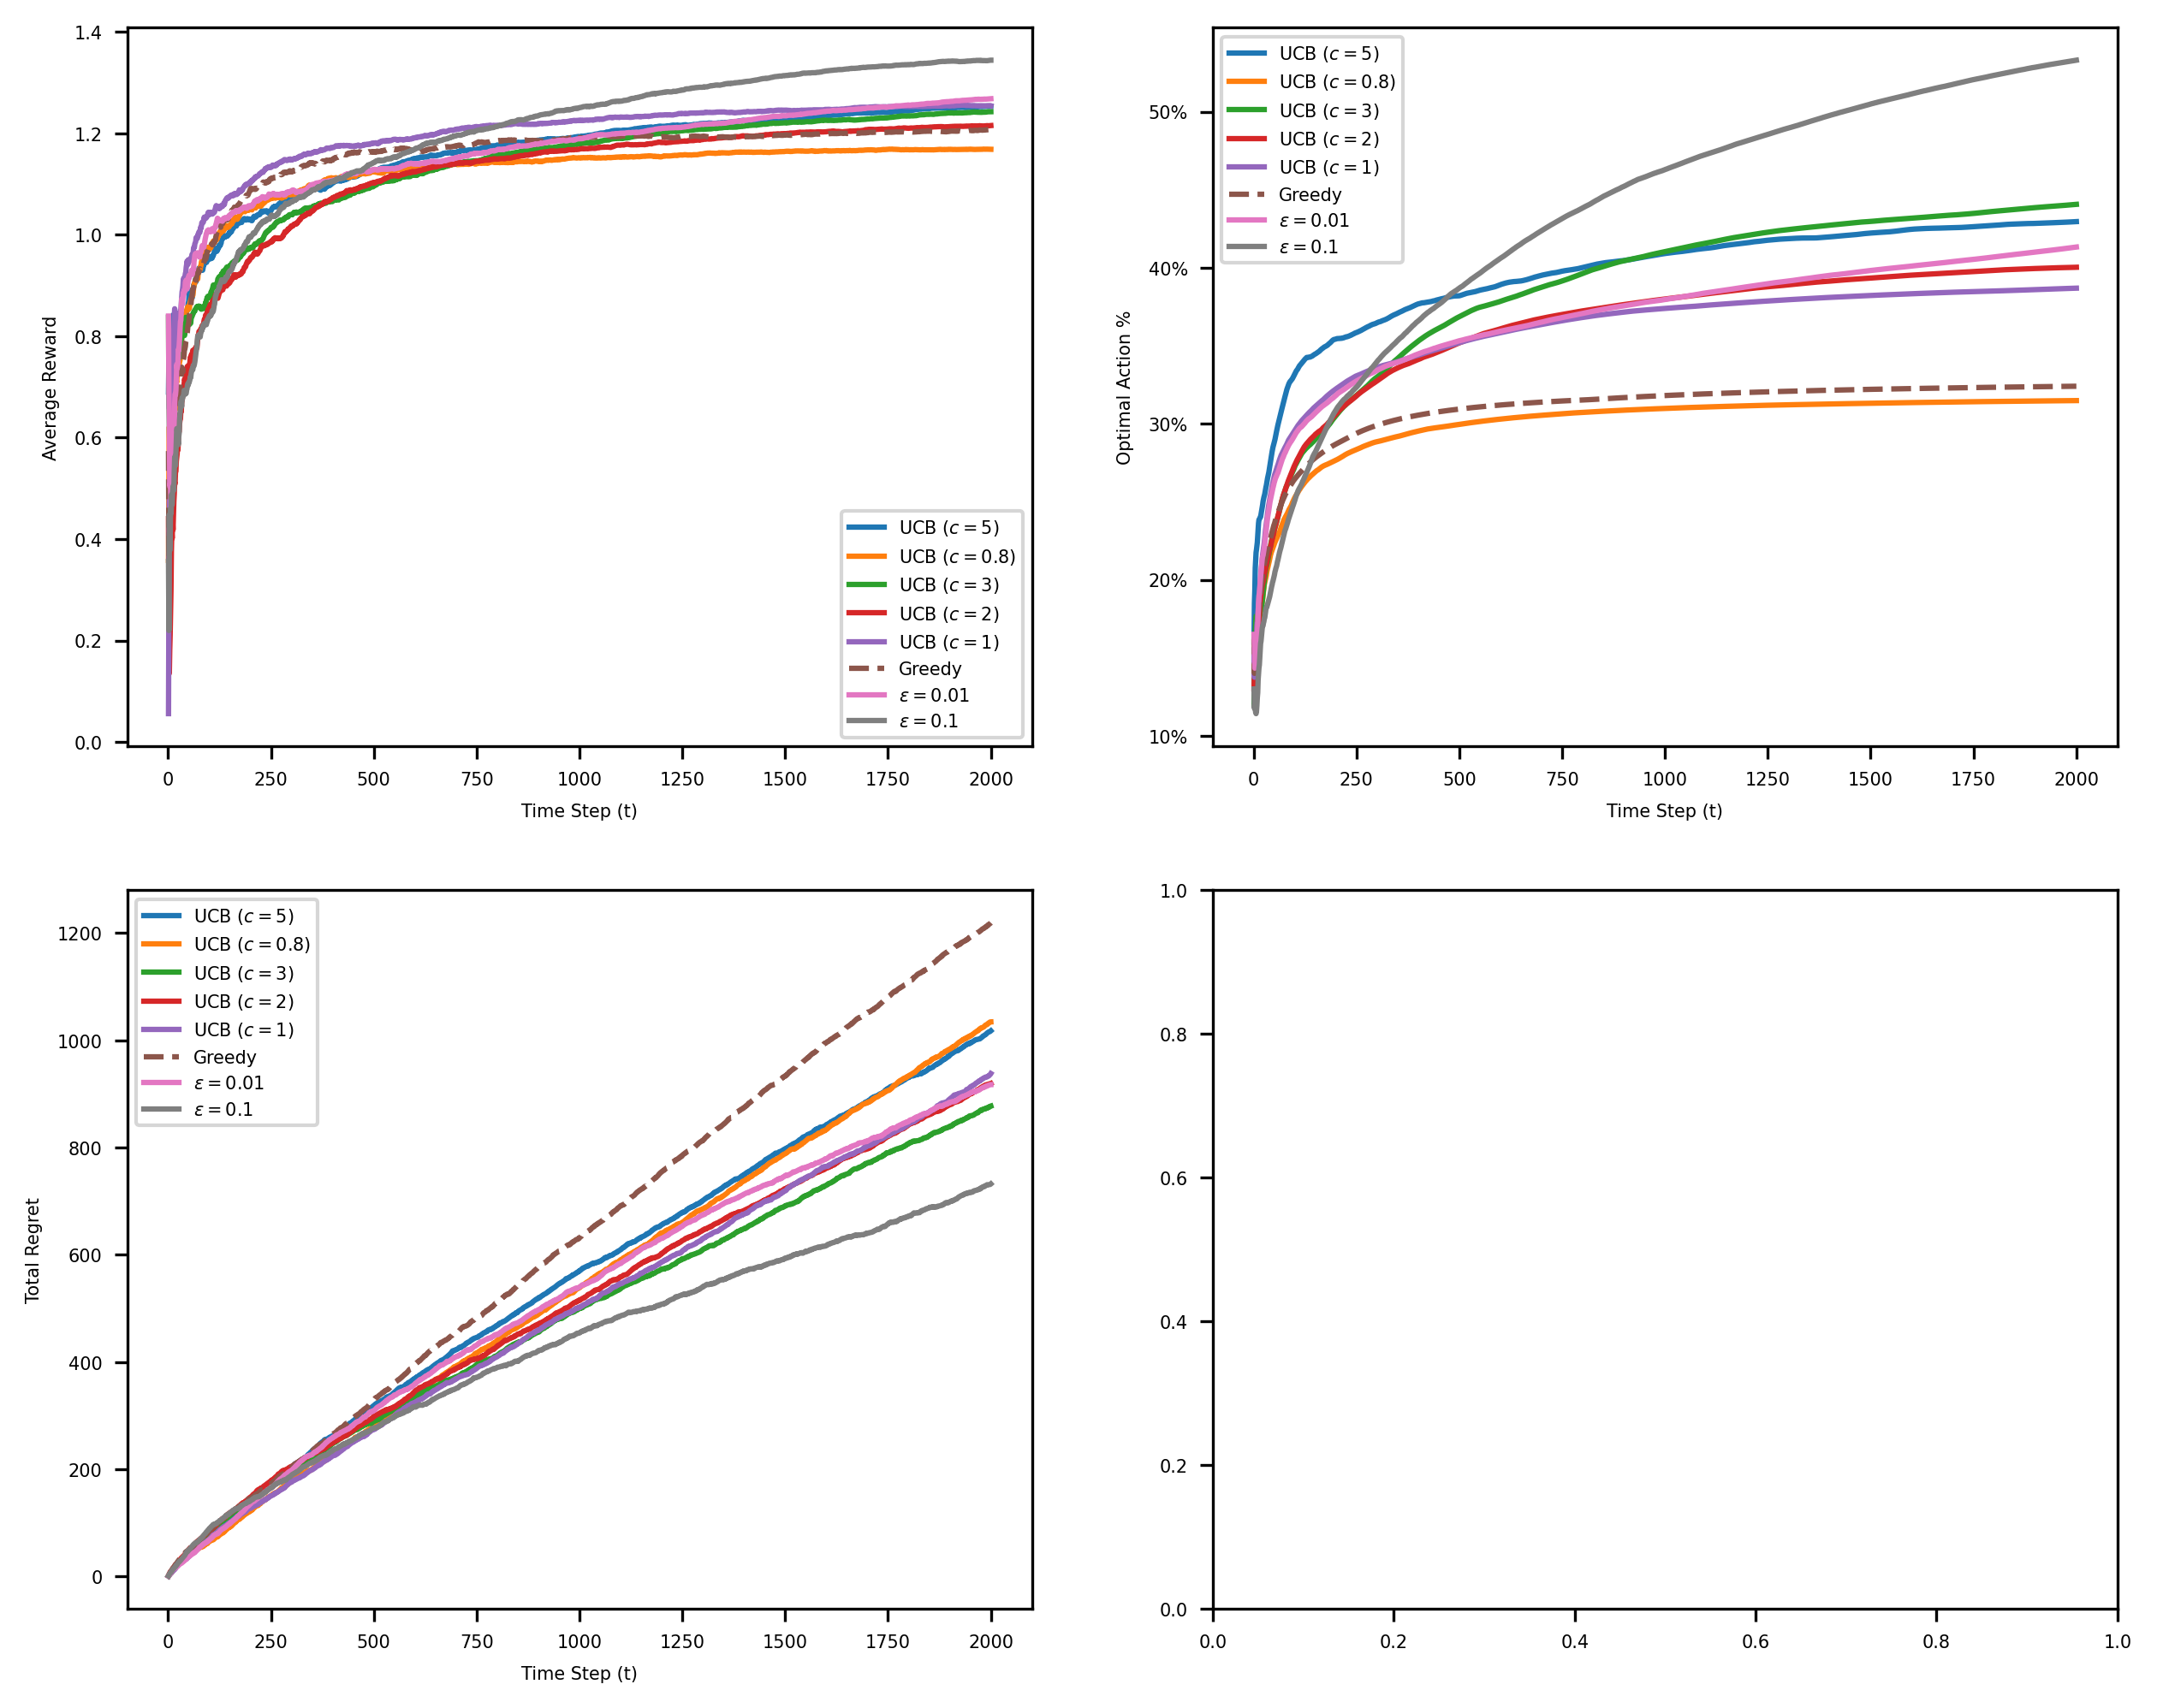

In [153]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=False, figsize=(10,8))

for result in results + cache:
    linestyle = '--' if result['name'] == 'Greedy' else None
    skip_time_steps = 0 # We skip some initial steps to avoid initial noisy spikes stretching the y-scale
    
    ax1.plot(range(skip_time_steps + 1,time_horizon+1), result['average_reward'][skip_time_steps:], label=result['name'], linestyle = linestyle)
    ax1.set_ylabel('Average Reward')
    ax1.set_xlabel('Time Step (t)')

    ax2.plot(range(1,time_horizon+1), result['optimal_action'], label=result['name'], linestyle = linestyle)
    ax2.set_ylabel('Optimal Action %')
    ax2.set_xlabel('Time Step (t)')
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

    ax3.plot(range(1,time_horizon+1), result['total_regret'], label=result['name'], linestyle = linestyle)
    ax3.set_ylabel('Total Regret')
    ax3.set_xlabel('Time Step (t)')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()